## **Machine Learning Aplication** - **Cancer Detection**


<div style="text-align: center;">
  <img src="https://cloudfront-us-east-1.images.arcpublishing.com/infobae/DPZGZQIW5NCMVA3NNNE4AAUPEA.jpg" alt="Descripción de la Imagen" style="width: 75%; height: auto;">


##### **Ing. Marcelo Mendoza - Data Analyst & Data Scientist**
##### Dataset: Cáncer de mama en Wisconsin (diagnóstico)

### 1. Descripción del Modelo
- Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (AAF) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. 

### 2. Librerías Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  #Importamos librería para dividir el dataset en 2 partes para train y test
from sklearn.preprocessing import StandardScaler, PowerTransformer # Librerías para realizar procesos de normalización y escalar datos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

### 3. Carga de Datos
- Procedemo a realizar la carga del conjunto de datos Breast Cancer desde la libreria Scikit-Learn

In [2]:
#Cargamos el dataset con el paquete incorporado en scikit-Learn
datos = load_breast_cancer(as_frame=True)


In [3]:
#Mostramos la
list(datos)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

De La lista anterior podemos obtener la siguiente información:
- **DESCR** Una descripción del conjunto de datos
- **data** Los datos de entrada, es una matriz Numpy 2d
- **target** Las etiquetas, una matriz Numpy 2d
- **feature_names** Nombres de variables

Procedemos a mostrar una descripción del archivo:

In [4]:
#print(datos.target_names)
datos['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#Código para mostrar los metadatos del dataset 
print(datos.DESCR)

Procedemos a generar el dataset en un objeto DataFrame de Pandas y mostramos los datos:

In [6]:
# creamos el dataframe con los datos y objetivo del dataset
#np.c_ es una función de NumPy que concatena arrays columna a columna.
df_cancer = pd.DataFrame(np.c_[datos['data'],datos['target']],
             columns = np.append(datos['feature_names'], ['target']))

df_cancer


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Verificamos la estructura del dataset:

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

El dataset consta de 31 variables de tipo float, de las cuales ninguna presenta valores nulos o faltantes.

### 4. Descripción de Variables:
Se calculan diez características de valor real para cada núcleo celular: 
- 0 radio (media de las distancias desde el centro hasta los puntos del perímetro) 
- 1 textura (desviación estándar de los valores de la escala de grises)
- 2 perímetro
- 3 Área
- 4 Suavidad (variación local en las longitudes de los radios) 
- 5 compacidad (perímetro^2 / área - 1.0) 
- 6 concavidad (severidad de las porciones cóncavas del contorno) 
- 7 puntos cóncavos (número de porciones cóncavas del contorno) 
- 8 simetría 
- 9 dimensión fractal ("aproximación de la línea de costa" - 1)

De cada característica se define la media (Mean) y el valor peor (worst)
- Por último la variable objetivo está configurada de la siguiente manera:
    - 0: Tumor maligno (cáncer).
    - 1: Tumor benigno (no cáncer).

### **5. Análisis de Datos**

Procedemos a mostrar un resumen estadístico de los datos:

In [8]:
#Resumen estadístico de variables numéricas

df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Creamos una variable para mapear las etiquetas
   
 - 0: Tumor maligno (cáncer).
 - 1: Tumor benigno (no cáncer).

In [9]:
cat = {0: 'Tumor Maligno', 1:'Tumor Benigno'}
df_cancer['CatTarget'] = df_cancer['target'].map(cat)

df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,CatTarget
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,Tumor Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,Tumor Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,Tumor Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,Tumor Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0,Tumor Maligno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,Tumor Maligno
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,Tumor Maligno
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,Tumor Maligno
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,Tumor Maligno


Mostramos la distribución de la variable objetivo:

<Axes: xlabel='CatTarget', ylabel='count'>

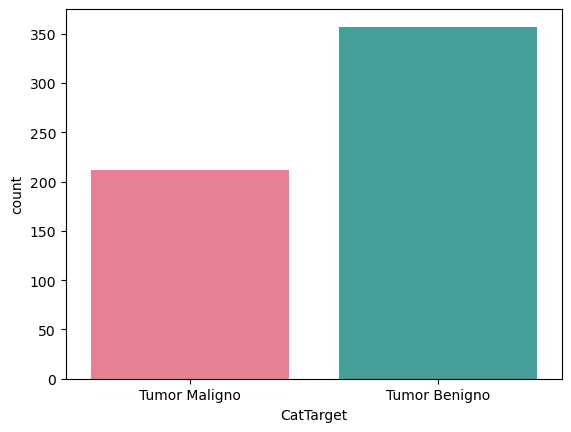

In [10]:
sns.countplot(df_cancer, x='CatTarget', hue='CatTarget', palette='husl')

Mostramos la distribución de los datos:

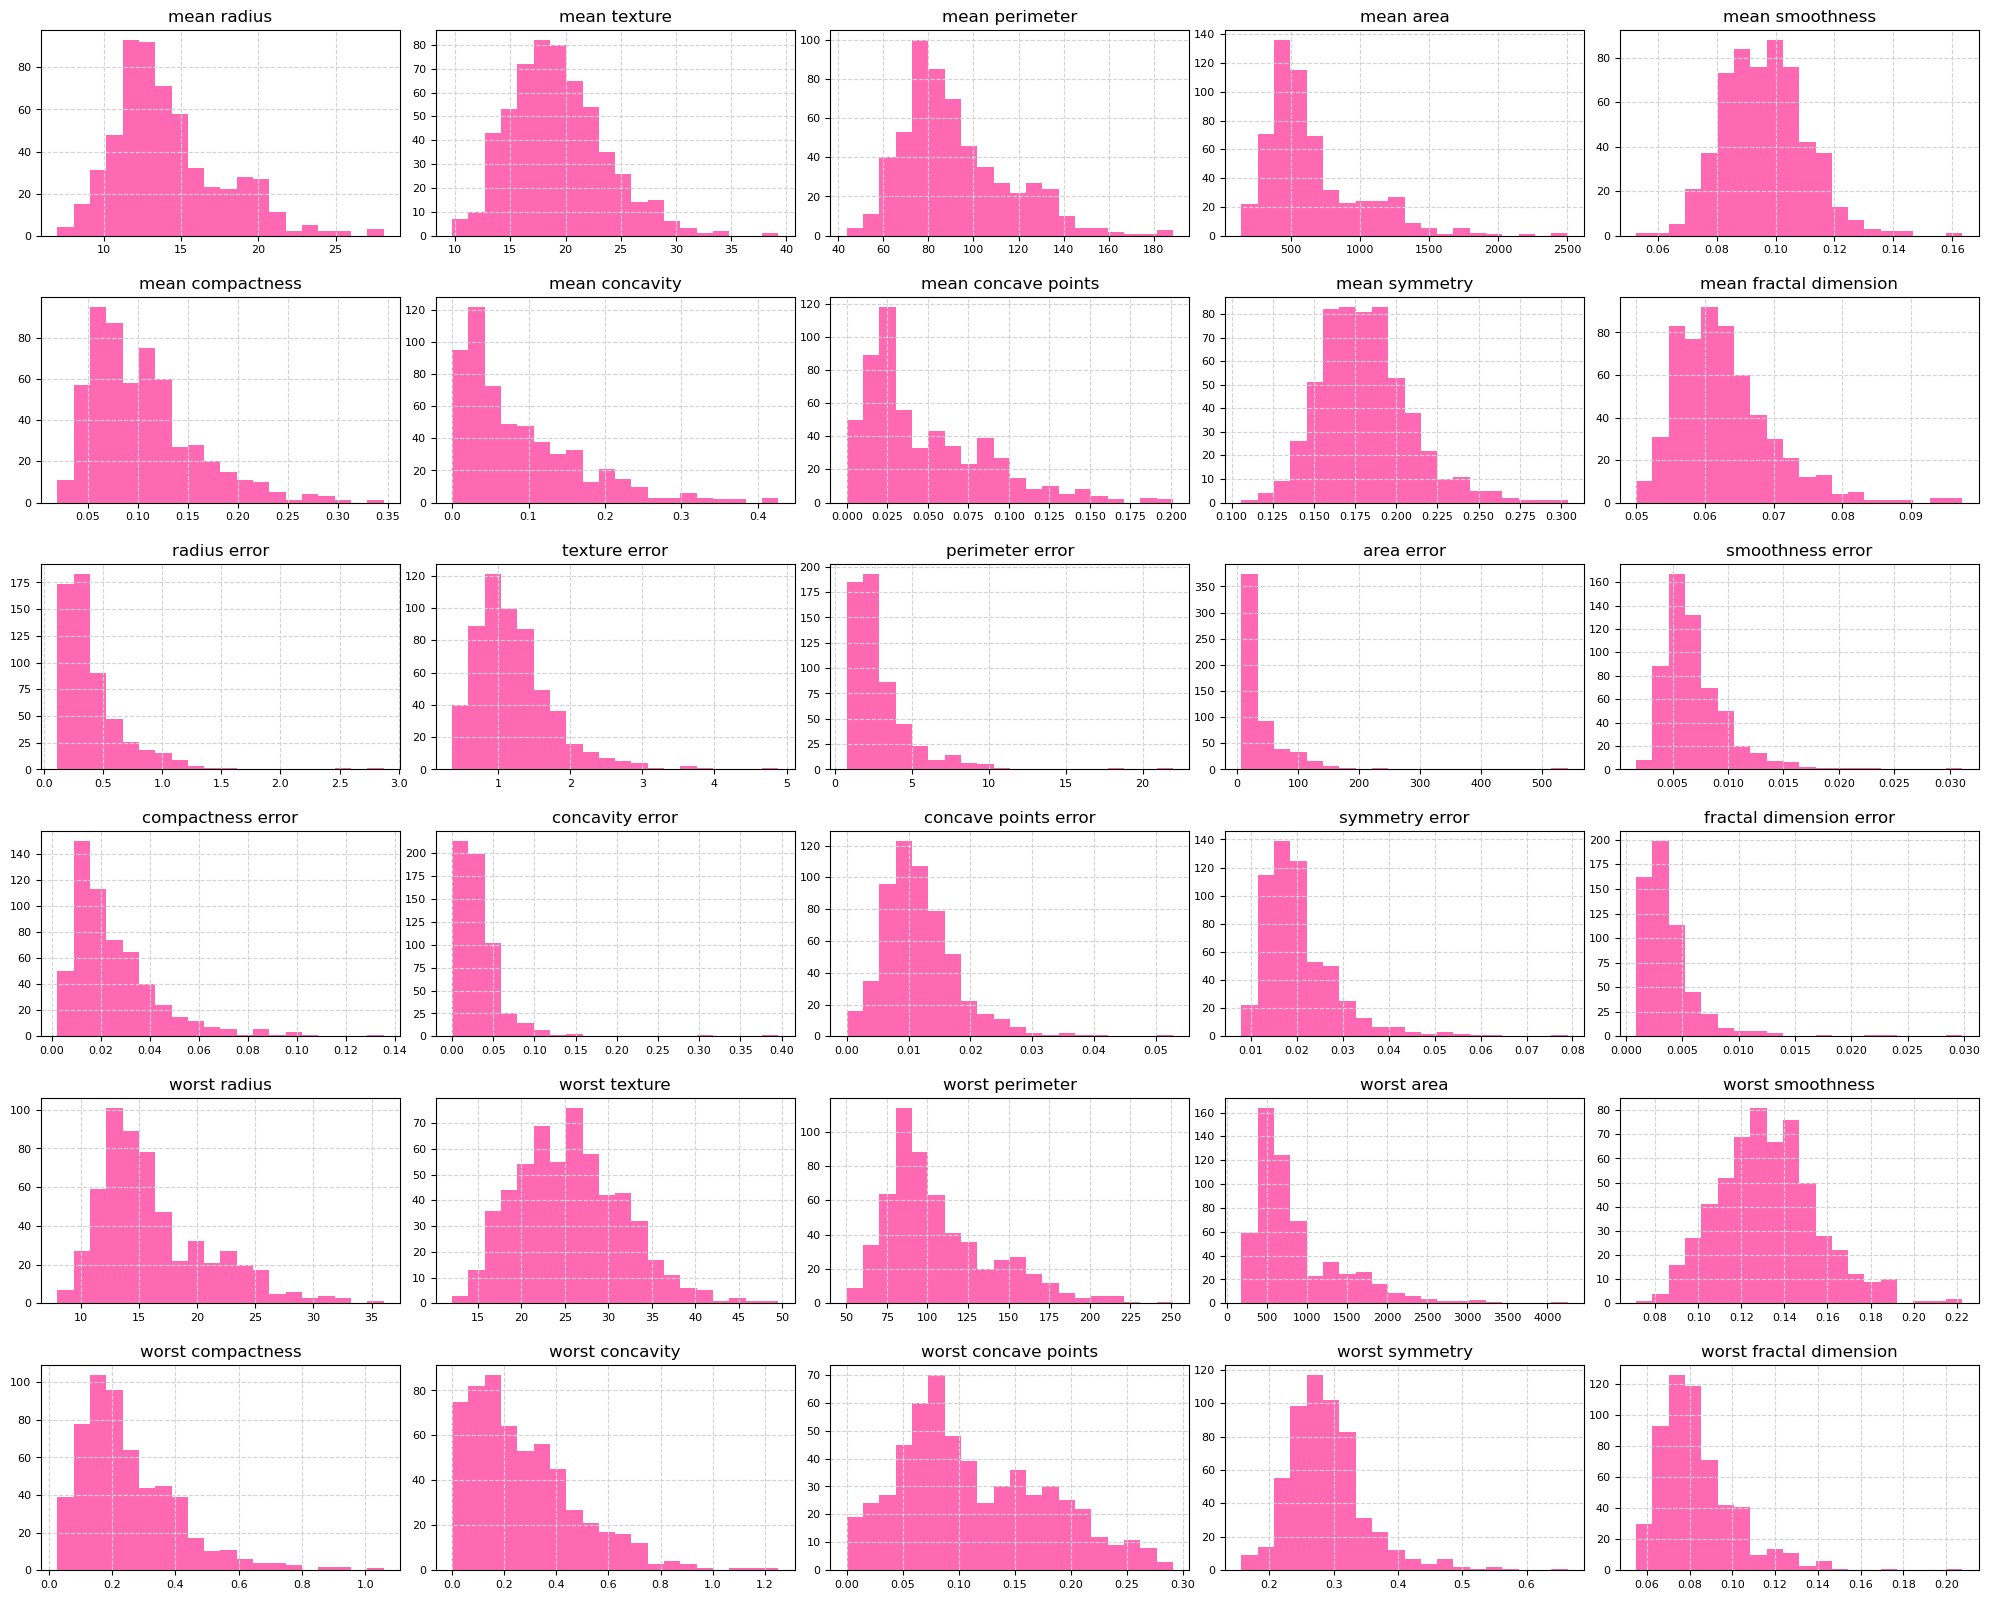

In [11]:
#Modificamos algunos parámetros que vienen por defecto de la libreria matplotlib

plt.rc('grid', linestyle='--', color='lightgray') #Modificamos el tipo de cuadricula con puntos y el color
plt.rc('font', size=8) #Establecemos el tamaño de letra a 10
plt.rc('axes', titlesize=12) #Establecemos en tamaño 10 los valores y titulos de los ejes
plt.rc('xtick', labelsize=8)  #Establecemos el tamaño de letra para los valores para el eje x
plt.rc('ytick', labelsize=8)  #Establecemos el tamaño de letra para los valores del eje y

#Genera el histograma, establecemos el tamaño en pulgadas, y definimos el numero de divisiones del gráfico en 50.
df_cancer.iloc[:,:30].hist(bins=20, figsize=(25,20), color='hotpink') 

#Ajusto el espacio
plt.subplots_adjust(wspace=0.1, hspace=0.3)
#Configuro el título del gráfico

plt.show()  #Esta línea muestra el gráfico en pantalla.

Vamos realizar el cálculo de correlaciones.

In [12]:
corr_matrix = df_cancer.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

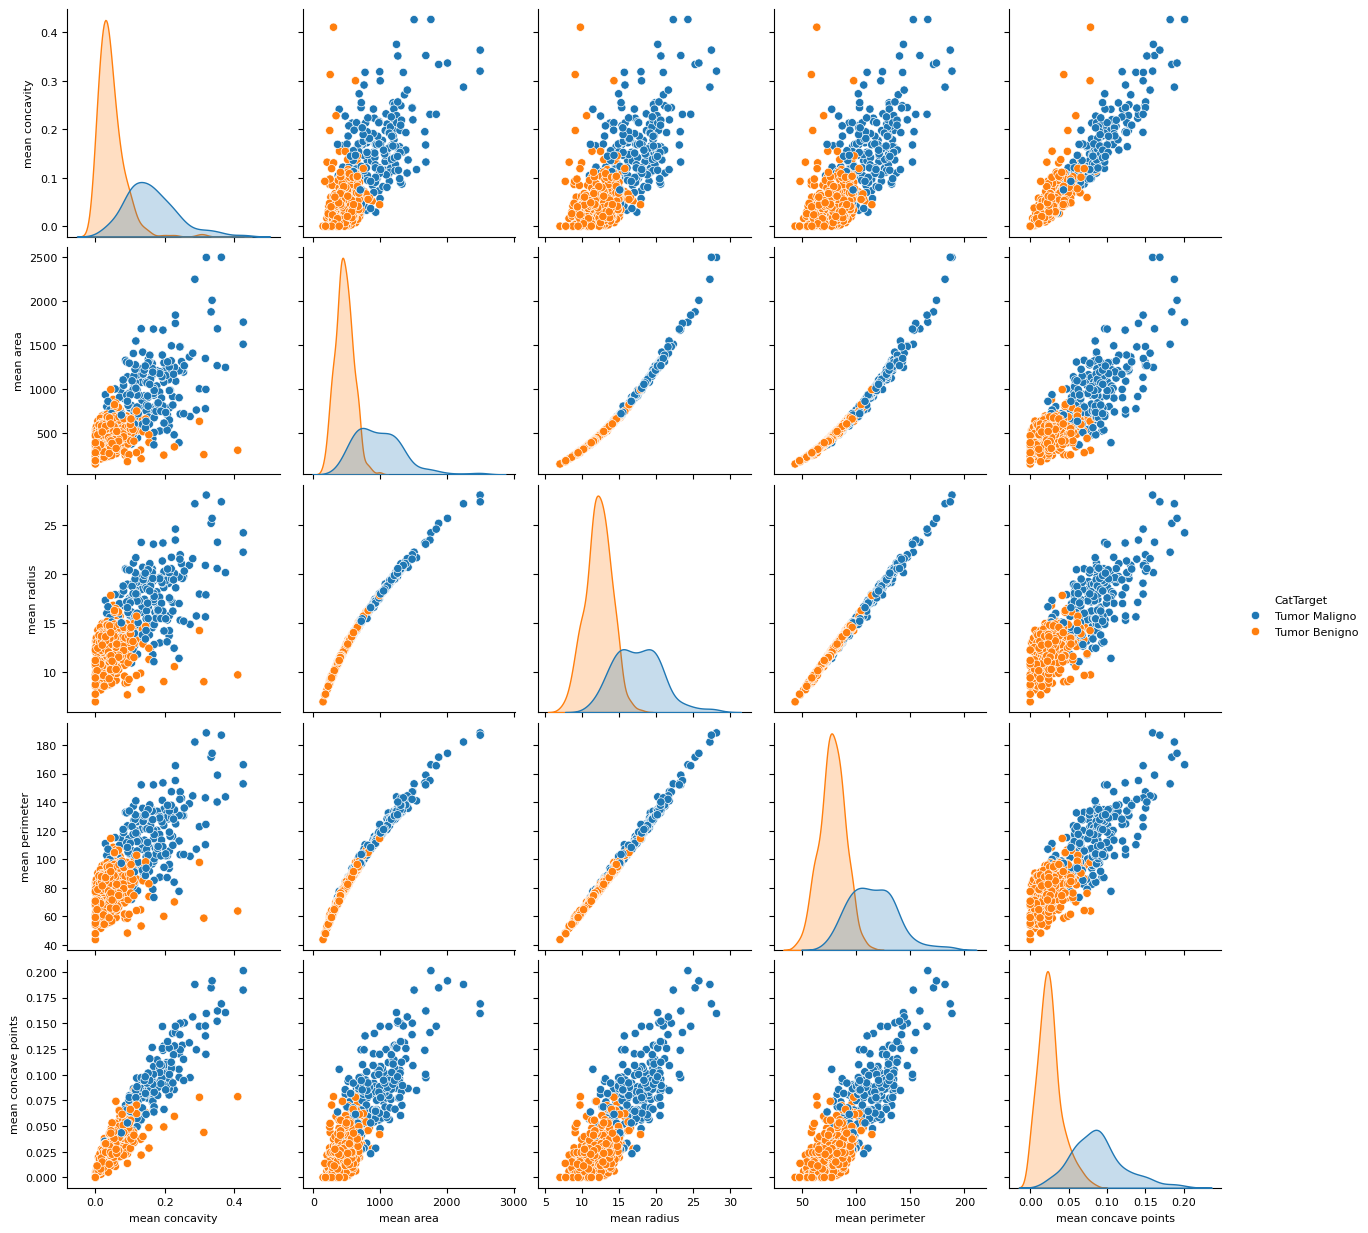

In [13]:
#Generamos matríz de correlación para las variables con fuerte correlación
#Para variables de la media
sns.pairplot(df_cancer, hue = 'CatTarget',
             vars = [
            'mean concavity',
            'mean area',
            'mean radius',
            'mean perimeter',
            'mean concave points'
        ] )

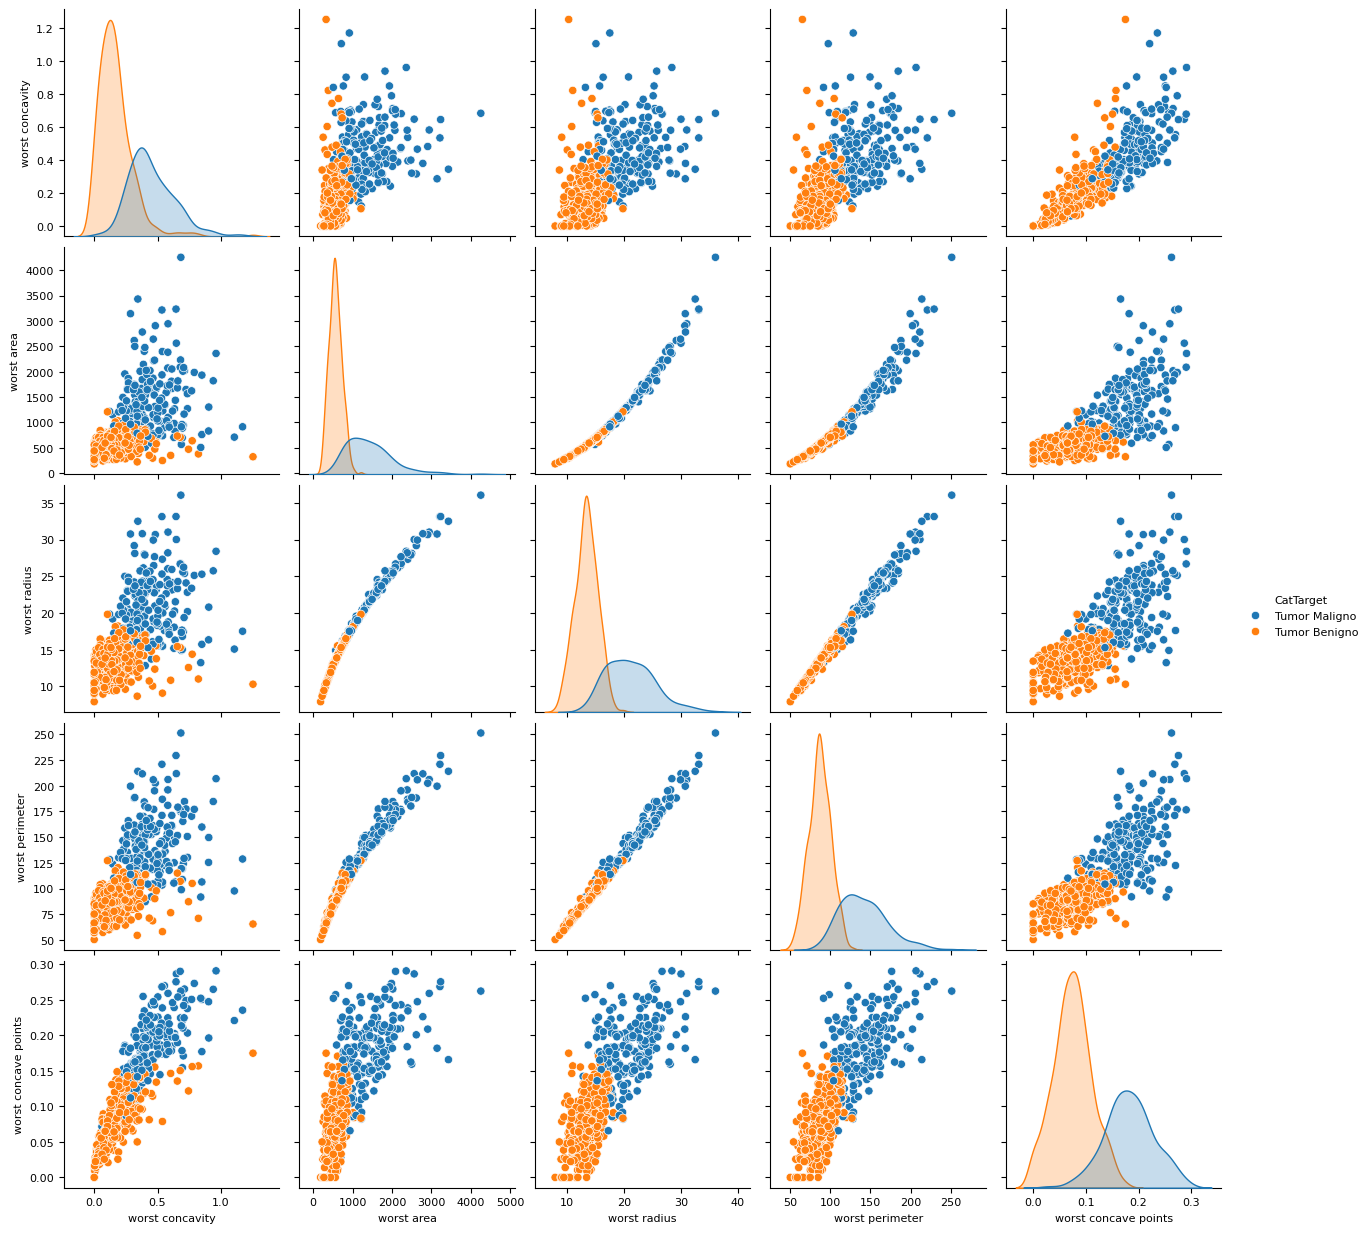

In [14]:
#Generamos matríz de correlación para las variables con fuerte correlación
#Para variables de la peor medida worst
sns.pairplot(df_cancer, hue = 'CatTarget',
             vars = [
            'worst concavity',
            'worst area',
            'worst radius',
            'worst perimeter',
            'worst concave points'

        ] )

Generamos un nuevo dataset eliminando las variables que no aportan en mayor medida al modelo

In [15]:
df_cancer_dat = df_cancer[['mean concavity',
            'mean area',
            'mean radius',
            'worst area',
            'mean perimeter',
            'worst radius',
            'mean concave points',
            'worst perimeter',
            'worst concave points',
            'target']]
df_cancer_dat

,mean concavity,mean area,mean radius,worst area,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points,target
0,0.30010,1001.0,17.99,2019.0,122.80,25.380,0.14710,184.60,0.2654,0.0
1,0.08690,1326.0,20.57,1956.0,132.90,24.990,0.07017,158.80,0.1860,0.0
2,0.19740,1203.0,19.69,1709.0,130.00,23.570,0.12790,152.50,0.2430,0.0
3,0.24140,386.1,11.42,567.7,77.58,14.910,0.10520,98.87,0.2575,0.0
4,0.19800,1297.0,20.29,1575.0,135.10,22.540,0.10430,152.20,0.1625,0.0
...,...,...,...,...,...,...,...,...,...,...
564,0.24390,1479.0,21.56,2027.0,142.00,25.450,0.13890,166.10,0.2216,0.0
565,0.14400,1261.0,20.13,1731.0,131.20,23.690,0.09791,155.00,0.1628,0.0
566,0.09251,858.1,16.60,1124.0,108.30,18.980,0.05302,126.70,0.1418,0.0
567,0.35140,1265.0,20.60,1821.0,140.10,25.740,0.15200,184.60,0.2650,0.0


### **6. Definición de Conjunto de Train y Test**

- Procedemos a dividir el conjunto de datos 80% para train y 20% para test.

In [16]:
  #Elimino la variable objetivo o etiquetas
X = df_cancer_dat.drop('target', axis=1)

 #Asigno las etiquetas al objeto
y = datos['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #Generamos el conjunto de datos para entrenamiento y pruebas


print("Total de registros Dataset de Entrenamiento 80%: ",len(x_train))
print("Total de registros Etiquetas de Entrenamiento 80%: ",len(y_train))
print("Total de registros Dataset de Pruebas 20%: ",len(x_test))
print("Total de registros Etiquetas de Pruebas 20%: ",len(y_test))



Total de registros Dataset de Entrenamiento 80%:  455
Total de registros Etiquetas de Entrenamiento 80%:  455
Total de registros Dataset de Pruebas 20%:  114
Total de registros Etiquetas de Pruebas 20%:  114


### **7. Normalización y Escalado**

Verificamos nuevamente la distribución de los datos del conjunto de train.

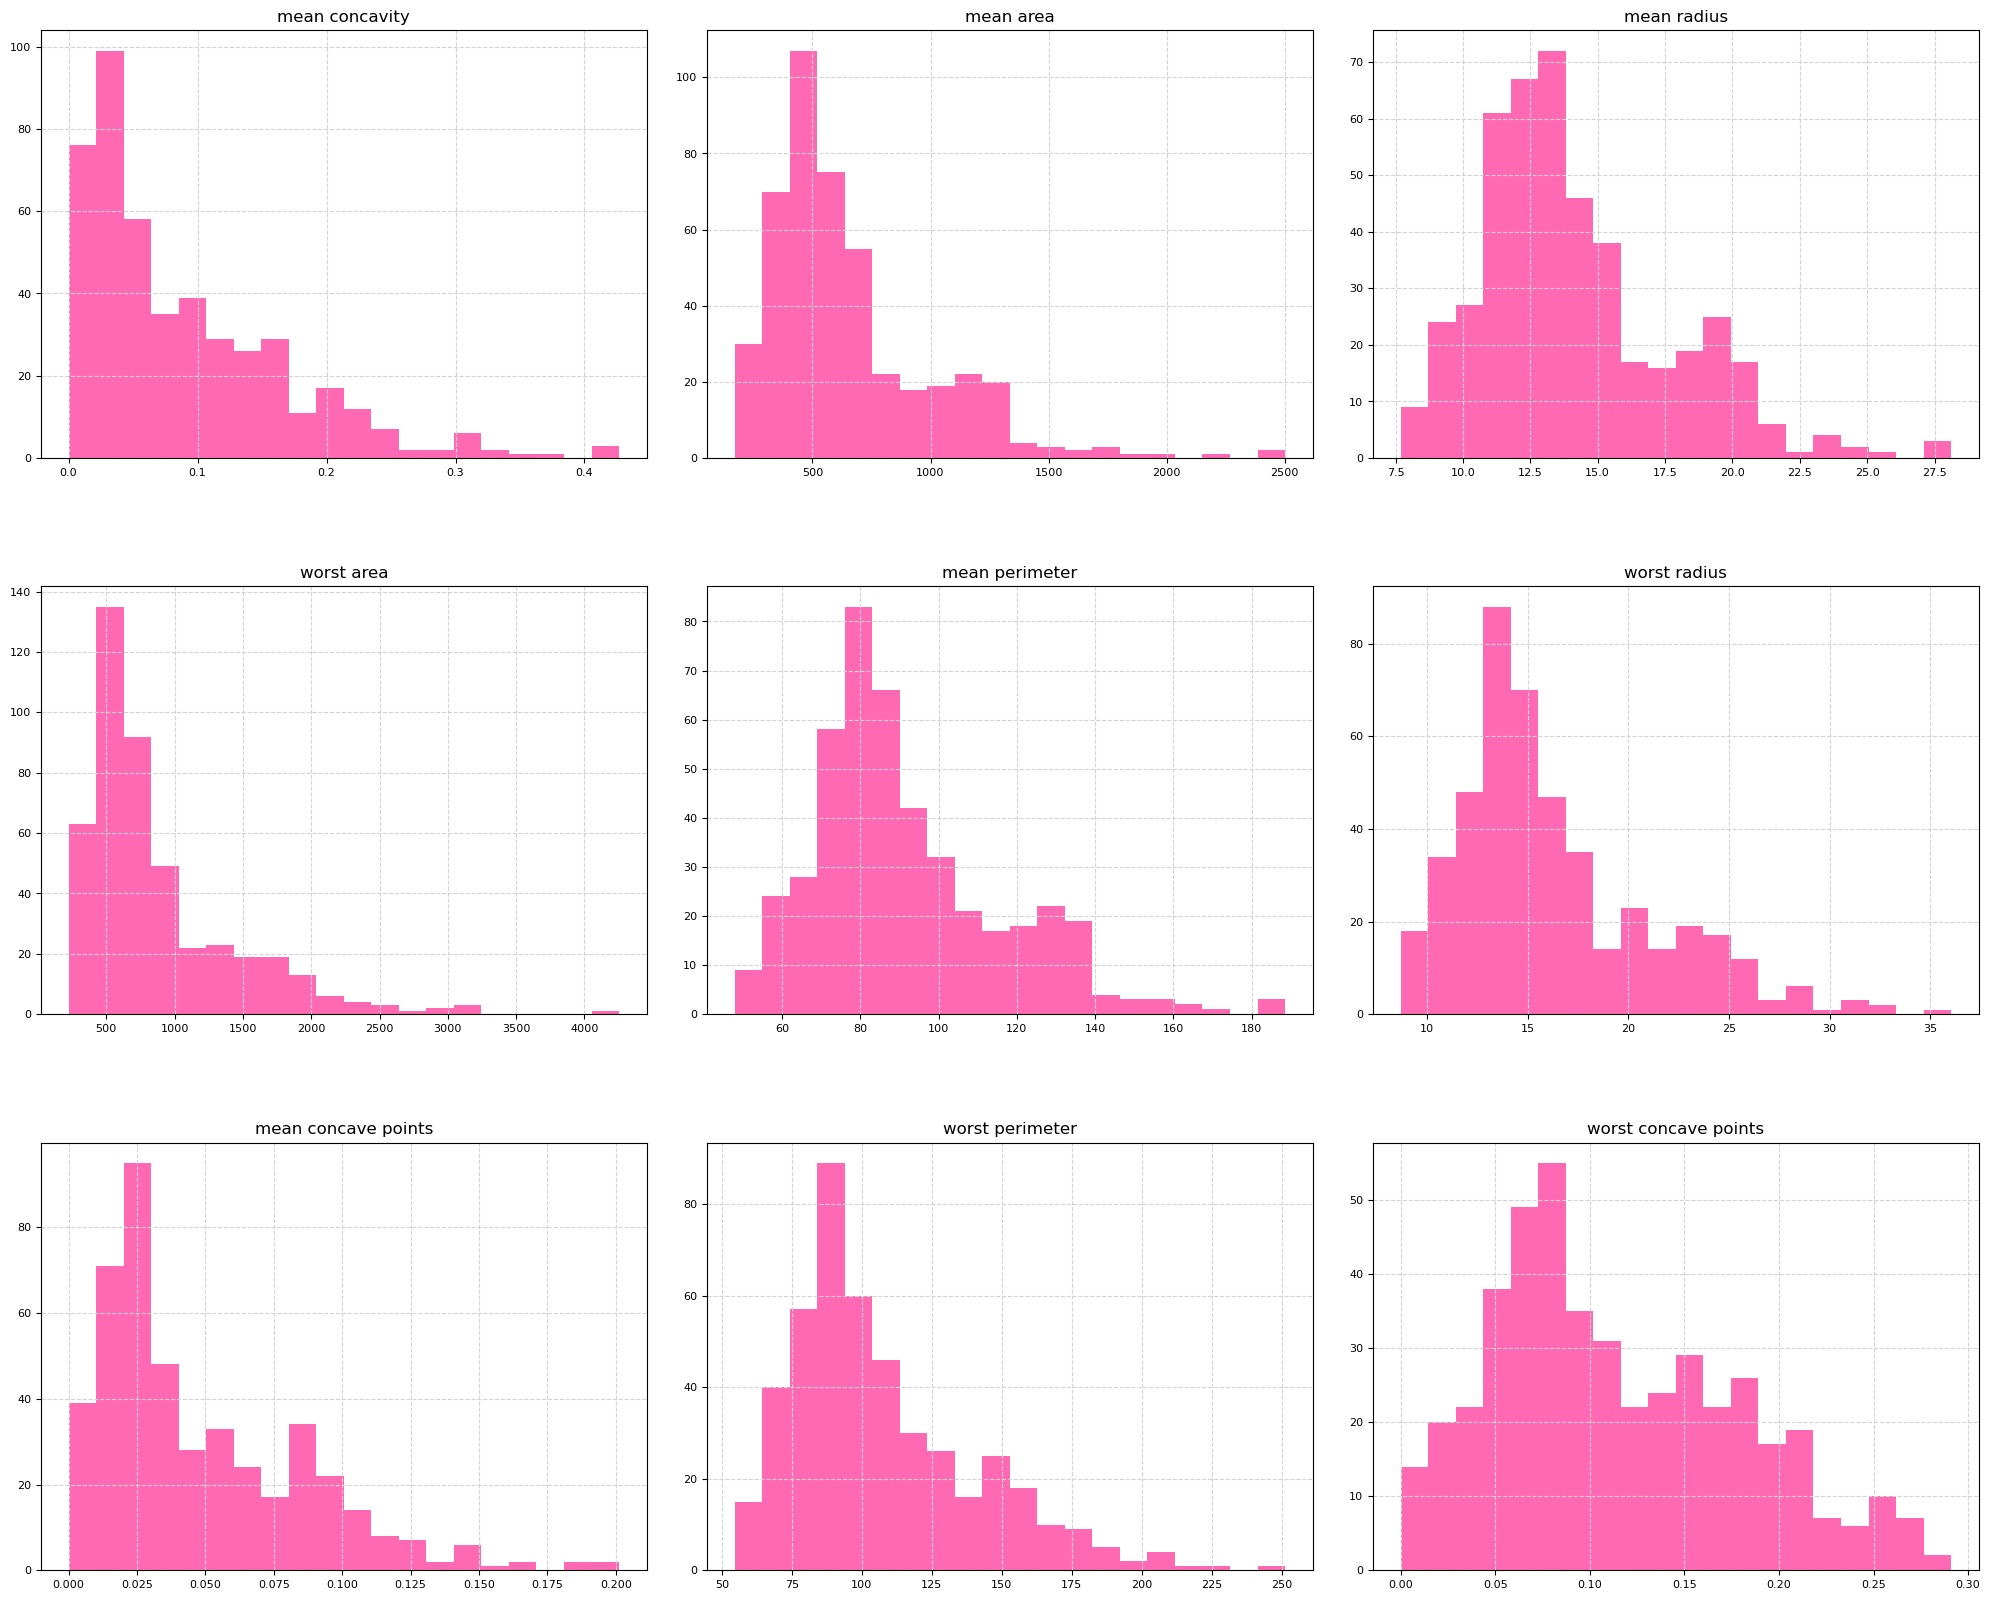

In [17]:
#Genera el histograma, establecemos el tamaño en pulgadas, y definimos el numero de divisiones del gráfico en 50.
x_train.iloc[:,:30].hist(bins=20, figsize=(25,20), color='hotpink') 
#Ajusto el espacio
plt.subplots_adjust(wspace=0.1, hspace=0.3)
#Configuro el título del gráfico

plt.show()  #Esta línea muestra el gráfico en pantalla.

La mayoria de variables estan sesgadas a la derecha, por lo que se procede a normalizar los datos.

In [18]:
Data_train = x_train.copy()
Data_test = x_test.copy()

In [19]:
##Normalización
#Aplicamos el metodo yeo-johnson que reduce el sesgo y normaliza la distribución de los datos
pt = PowerTransformer(method='yeo-johnson') 
 
#Aplicamos a los datos de entrenamiento
Data_train = pt.fit_transform(x_train)
#Aplicamos a los datos de prueba
Data_test = pt.fit_transform(x_test) 


## Escalado
#Llamada al metodo para escalar las variables
scaler = StandardScaler() 

#Aplicamos a los datos de entrenamiento
Data_train = scaler.fit_transform(Data_train)
#Aplicamos a los datos de prueba
Data_test = scaler.fit_transform(x_test) 

#Asiganamos los cambios al dataset de entrenamiento, el mismo que es una matriz numpy
x_train = Data_train
x_test = Data_test

### **8. Creación de Modelo de ML**

#### **8.1. Modelo de Clasificasión SGDClassifier**

- Vamos a configurar un clasificador SGD(Stochastic Gradient Descent, descenso de gradiente estocástico)
- Este clasificador es capaz de manejar conjuntos de datos muy grandes con eficiencia.

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)    #Creamos
sgd_clf.fit(x_train, y_train)   #Entrenamos

#Predecimos
#Train
y_pred_sgd = sgd_clf.predict(x_train)   #Predecimos
#Test
y_pred_sgd_test = sgd_clf.predict(x_test)   #Predecimos

In [21]:
 #Evaluamos Accuracy(Precisión) y Recall (Sensibilidad)

#Train
print('Accuracy Modelo SGDClassifier - Train: ', accuracy_score(y_train, y_pred_sgd))
print('Recall Modelo SGDClassifier - Test: ', recall_score(y_test, y_pred_sgd_test))

#Test
print('Accuracy Modelo SGDClassifier - Train: ', recall_score(y_train, y_pred_sgd))
print('Recall Modelo SGDClassifier - Test: ', accuracy_score(y_test, y_pred_sgd_test))

Accuracy Modelo SGDClassifier - Train:  0.9098901098901099
Recall Modelo SGDClassifier - Test:  1.0
Accuracy Modelo SGDClassifier - Train:  0.8741258741258742
Recall Modelo SGDClassifier - Test:  0.9649122807017544


##### **8.1.1. Métricas de Performance SGD**

- Vamos a generar una matríz de confusión y reporte de métricas de precisión y recall.

              Reporte de Precisión Vs Sensibilidad

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       169
           1       0.98      0.87      0.92       286

    accuracy                           0.91       455
   macro avg       0.90      0.92      0.91       455
weighted avg       0.92      0.91      0.91       455



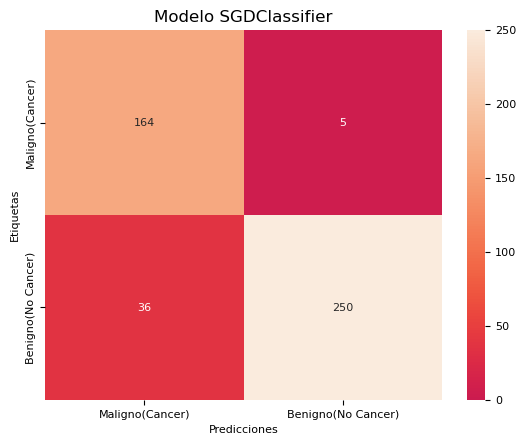

In [22]:
#Generamos la matriz de confusión para validar resultados de Train
cm= confusion_matrix(y_train, y_pred_sgd)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='rocket', cbar=True, vmin=0, fmt='d',
            xticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)'],
            yticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)']
            )
hm.set_title('Modelo SGDClassifier')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad\n')
print(classification_report(y_train,y_pred_sgd))

              Reporte de Precisión Vs Sensibilidad Test

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



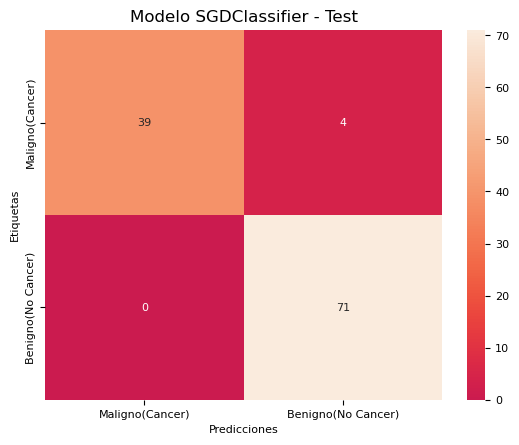

In [23]:
#Generamos la matriz de confusión para validar resultados de Test
cm= confusion_matrix(y_test, y_pred_sgd_test)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='rocket', cbar=True, vmin=0, fmt='d',
            xticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)'],
            yticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)']
            )
hm.set_title('Modelo SGDClassifier - Test')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad Test\n')
print(classification_report(y_test,y_pred_sgd_test))

#### **8.2. Modelo de Random Forest Classifier**

- Vamos a crear un modelo RandomForestClassifier, cuya curva precisión/sensibilidad y puntuación F1 pueden compararse con las del SGDClasifier.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)    #Creamos
rf_clf.fit(x_train, y_train)    #Entrenamos

#Predecimos
#Train
y_pred_rf_train = rf_clf.predict(x_train)
#Test
y_pred_rf_test = rf_clf.predict(x_test)

In [25]:
 #Evaluamos Accuracy(Precisión) y Recall (Sensibilidad)

#Train
print('Accuracy Modelo SGDClassifier - Train: ', accuracy_score(y_train, y_pred_rf_train))
print('Recall Modelo SGDClassifier - Test: ', recall_score(y_test, y_pred_rf_test))

#Test
print('Accuracy Modelo SGDClassifier - Train: ', recall_score(y_train, y_pred_rf_train))
print('Recall Modelo SGDClassifier - Test: ', accuracy_score(y_test, y_pred_rf_test))

Accuracy Modelo SGDClassifier - Train:  0.9978021978021978
Recall Modelo SGDClassifier - Test:  1.0
Accuracy Modelo SGDClassifier - Train:  1.0
Recall Modelo SGDClassifier - Test:  0.9298245614035088


##### **8.2.1. Métricas de Performance RFClassifier**

- Vamos a generar una matríz de confusión y reporte de métricas de precisión y recall.

              Reporte de Precisión Vs Sensibilidad - Train

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



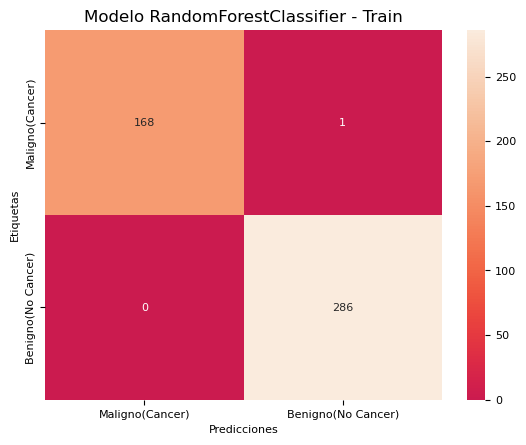

In [26]:
#Generamos la matriz de confusión para validar resultados
cm= confusion_matrix(y_train, y_pred_rf_train)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='rocket', cbar=True, vmin=0, fmt='d',
            xticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)'],yticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)']
            )
hm.set_title('Modelo RandomForestClassifier - Train')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad - Train\n')
print(classification_report(y_train,y_pred_rf_train))

              Reporte de Precisión Vs Sensibilidad - Test

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



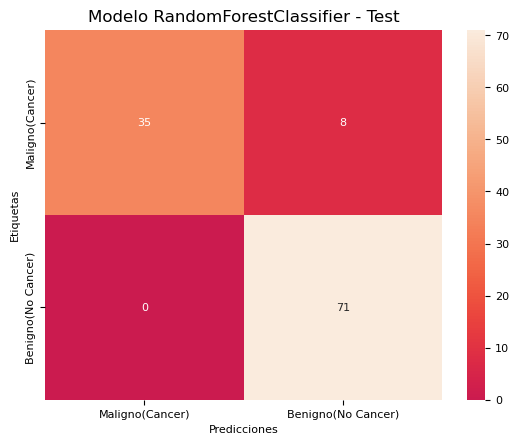

In [27]:
#Generamos la matriz de confusión para validar resultados
cm= confusion_matrix(y_test, y_pred_rf_test)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='rocket', cbar=True, vmin=0, fmt='d',
            xticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)'],
            yticklabels=['Maligno(Cancer)', 'Benigno(No Cancer)']
            )
hm.set_title('Modelo RandomForestClassifier - Test')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad - Test\n')
print(classification_report(y_test,y_pred_rf_test))